<a href="https://colab.research.google.com/github/isha-ingersol/ComputerVisionAndImaging/blob/main/CVITask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processing 43590 AM.bmp:
Applying Sobel edge detection...


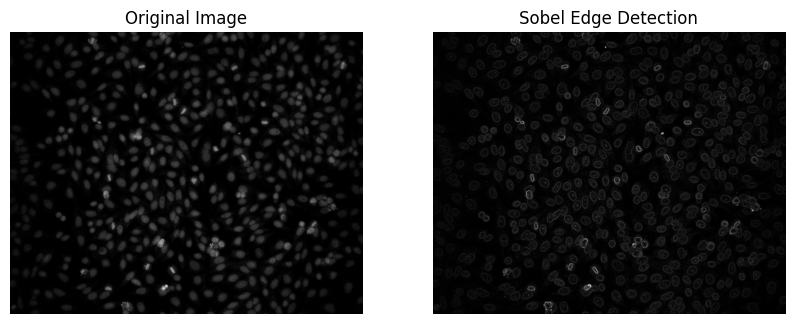

Applying Prewitt edge detection...


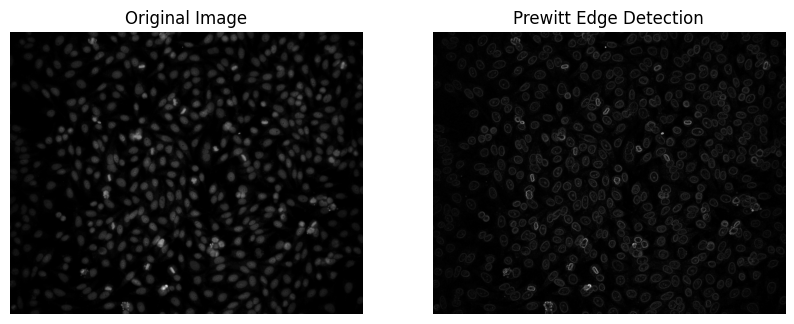

Applying Roberts edge detection...


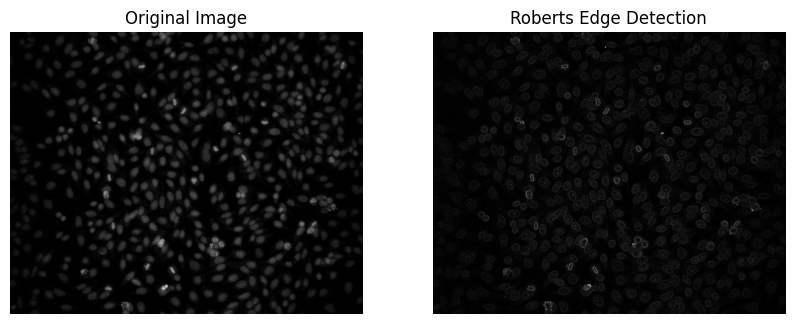

Applying Scharr edge detection...


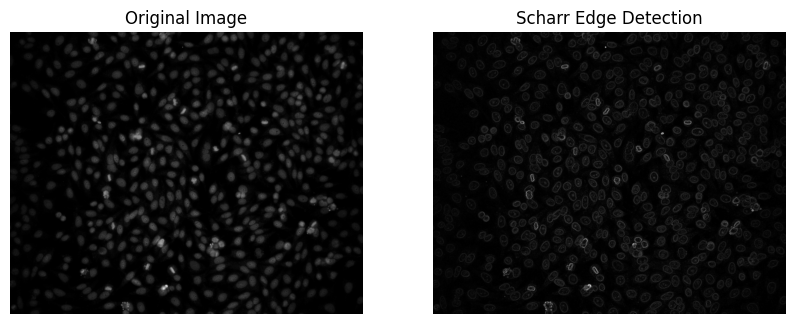

Applying Canny edge detection...


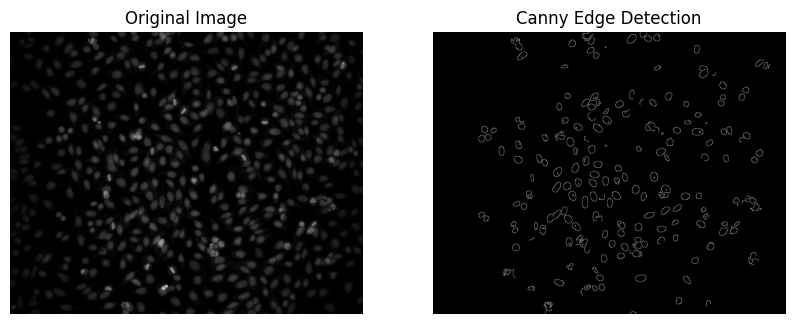

Processing 9343 AM.bmp:
Applying Sobel edge detection...


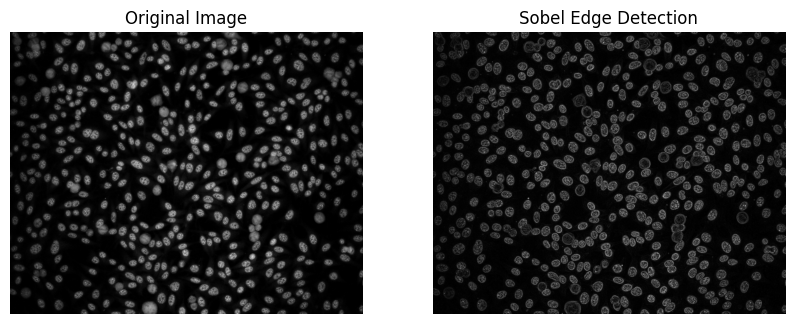

Applying Prewitt edge detection...


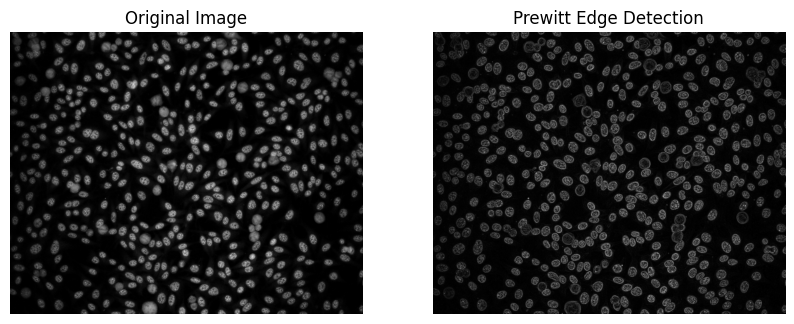

Applying Roberts edge detection...


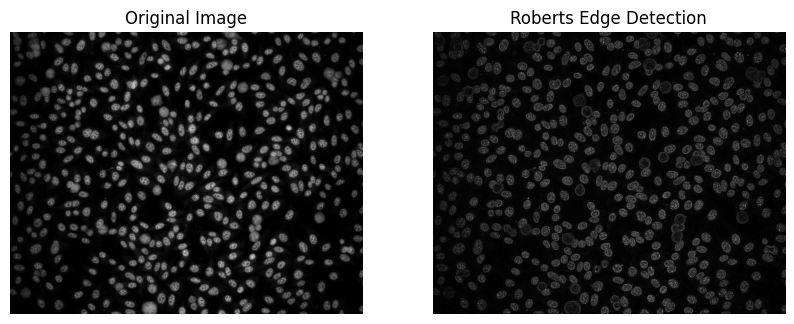

Applying Scharr edge detection...


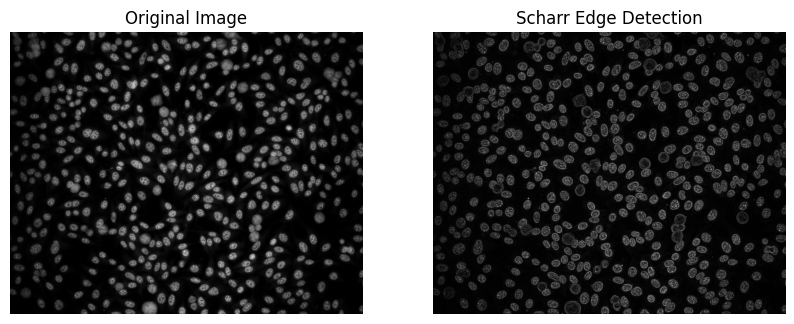

Applying Canny edge detection...


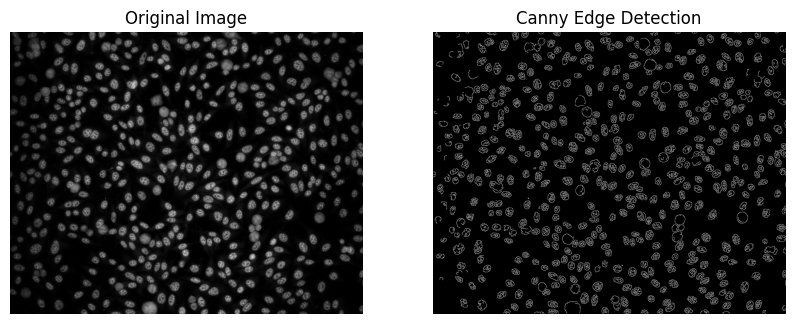

Processing 10905 JL.bmp:
Applying Sobel edge detection...


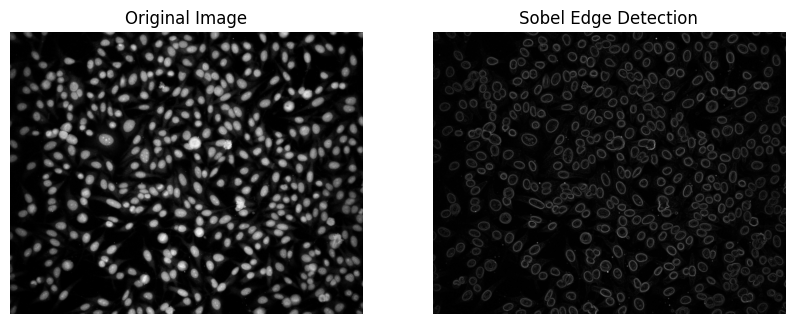

Applying Prewitt edge detection...


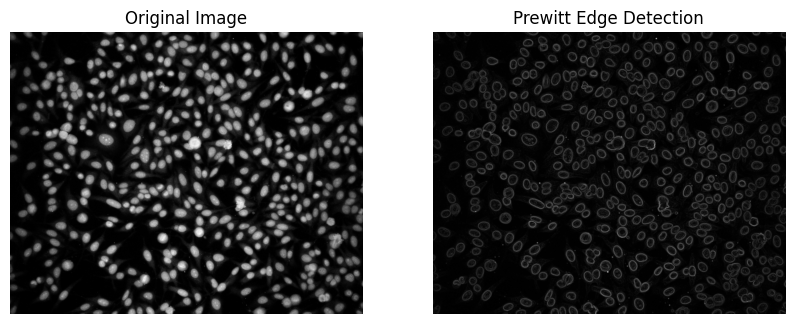

Applying Roberts edge detection...


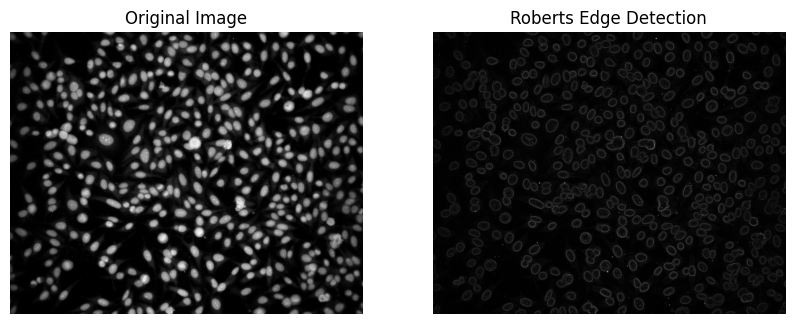

Applying Scharr edge detection...


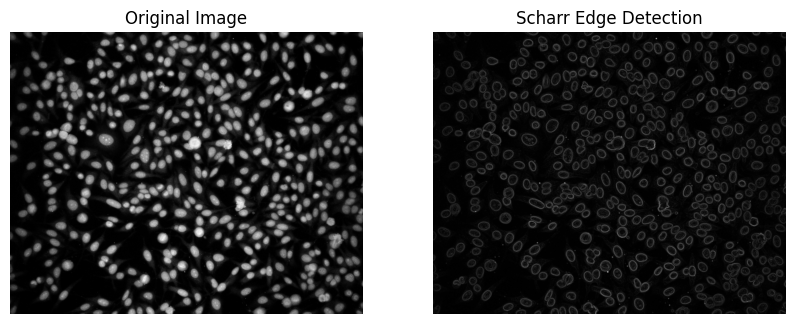

Applying Canny edge detection...


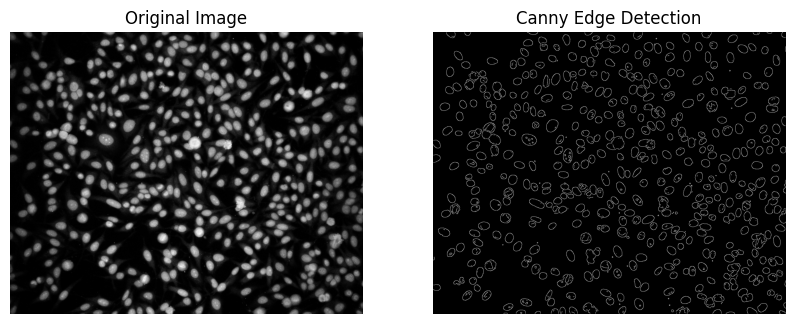

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, feature
import os

# Function to apply edge detection and display results
def apply_edge_detection(image_path, method):
    # Read the image
    image = io.imread(image_path, as_gray=True)

    # Apply edge detection
    if method == 'Sobel':
        edges = filters.sobel(image)
    elif method == 'Prewitt':
        edges = filters.prewitt(image)
    elif method == 'Roberts':
        edges = filters.roberts(image)
    elif method == 'Scharr':
        edges = filters.scharr(image)
    elif method == 'Canny':
        edges = feature.canny(image)

    # Display the original image and the detected edges
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.axis('off')
    plt.subplot(122), plt.imshow(edges, cmap='gray')
    plt.title(f'{method} Edge Detection'), plt.axis('off')
    plt.show()

# Specify the folder containing the images
folder_path = "/content/Task2"

# Get the list of image files in the folder
image_files = [file for file in os.listdir(folder_path) if file.endswith('.bmp')]

# Apply edge detection to each image with different methods
methods = ['Sobel', 'Prewitt', 'Roberts', 'Scharr', 'Canny']

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    print(f'Processing {image_file}:')
    for method in methods:
        print(f'Applying {method} edge detection...')
        apply_edge_detection(image_path, method)


#Task 2: Edge Detection and Analysis

#AIM:
The aim of this task is to apply various edge detection techniques to three given images and analyze the results to understand the performance of each method.

#METHOD:

- Image Loading: The first step involved loading the three images provided in the dataset folder.

- Edge Detection Techniques: We applied five different edge detection techniques to each image:
  - Sobel
  - Prewitt
  - Roberts
  - Scharr
  - Canny

- Algorithm and Calculations:
  - For each technique, we converted the images to grayscale and applied the respective edge detection algorithm.
  - The resulting edge-detected images were then displayed alongside the original images for visual comparison.

- Post-Processing Steps:
  - After obtaining the edges, we performed post-processing steps such as:
    - Thresholding: Setting a threshold to distinguish between edge and non-edge pixels.
    - Morphological operations: Optional step for refining the detected edges, such as erosion or dilation.

#RESULTS:
- The results of each edge detection technique were visually inspected and compared.
- We observed that Sobel, Prewitt, Roberts, and Scharr produced similar results with subtle differences in edge thickness and orientation.
- Canny edge detection, on the other hand, yielded smoother and more continuous edges with better noise suppression.

#CONCLUSIONS:
- Among the tested edge detection techniques, Canny demonstrated superior performance in terms of noise reduction and edge continuity.
- However, the choice of the best technique may depend on the specific characteristics of the images and the application requirements.
- Further analysis and optimization, such as parameter tuning and post-processing, may be required for optimal edge detection results in different scenarios.

#Performance Analysis:
- Visual inspection alone may not be sufficient for a comprehensive performance analysis.
- Quantitative evaluation metrics such as precision, recall, and F1-score could provide more insights into the accuracy of edge detection.
- Task 4, which involves the comparison of ground truth edges with detected edges, can provide additional information for performance assessment.
